In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data.load_mnist import load_mnist
from core.functions import *
from core.gradient import *
from core.layers import *
from core.network.twolayernet import BackPropagationNet
from core.network.threelayernet import ThreeLayerNet

(X_train, T_train), (X_test, T_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = X_train.shape[0]

colors = [
    "#ef4444",  # 0
    "#f97316",  # 1
    "#f59e0b",  # 2
    "#eab308",  # 3
    "#84cc16",  # 4
    "#22c55e",  # 5
    "#10b981",  # 6
    "#14b8a6",  # 7
    "#06b6d4",  # 8
    "#0ea5e9",  # 9
    "#3b82f6",  # 10
    "#6366f1",  # 11
    "#8b5cf6",  # 12
    "#a855f7",  # 13
    "#d946ef",  # 14
    "#ec4899",  # 15
    "#f43f5e",  # 16
    "#f3f4f6",  # 17
    "#d1d5db",  # 18
    "#6b7280",  # 19
    "#374151",  # 20
    "#111827",  # 21
]

def rgb_to_float(rgb):
    r = int(rgb[1:3], 16) / 255.0
    g = int(rgb[3:5], 16) / 255.0
    b = int(rgb[5:7], 16) / 255.0

    return (r, g, b)


color_pal = list(map(rgb_to_float, colors))

## Base Network
Two layer network with back propagation and ReLU activation function

In [2]:
base_network = BackPropagationNet(784, 50, 10)

base_network_iters_num = 10000
base_network_batch_size = 100
base_network_lr = 0.1

base_network_train_loss_list = []
base_network_train_acc_list = []
base_network_test_acc_list = []

base_network_iter_per_epoch = max(train_size / base_network_batch_size, 1)

for i in range(base_network_iters_num):
    batch_mask = np.random.choice(train_size, base_network_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = base_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        base_network.params[key] -= base_network_lr * grad[key]

    loss = base_network.loss(X_batch, T_batch)
    base_network_train_loss_list.append(loss)

    if i % base_network_iter_per_epoch == 0:
        base_network_train_acc = base_network.accuracy(X_train, T_train)
        base_network_test_acc = base_network.accuracy(X_test, T_test)
        base_network_train_acc_list.append(base_network_train_acc)
        base_network_test_acc_list.append(base_network_test_acc)

print(f"Base Network Final Loss: {base_network_train_loss_list[-1]}")
print(f"Base Network Final Train Accuracy: {base_network_train_acc_list[-1]}")
print(f"Base Network Final Test Accuracy: {base_network_test_acc_list[-1]}")

Base Network Final Loss: 0.18450077234479761
Base Network Final Train Accuracy: 0.9634
Base Network Final Test Accuracy: 0.9514


## Two Layer Network With Swish Activation Function

In [3]:
swish_network = BackPropagationNet(784, 50, 10, activation_layer=Swish)

swish_iters_num = 10000
swish_batch_size = 100
swish_lr = 0.1

swish_train_loss_list = []
swish_train_acc_list = []
swish_test_acc_list = []

swish_iter_per_epoch = max(train_size / swish_batch_size, 1)

for i in range(swish_iters_num):
    batch_mask = np.random.choice(train_size, swish_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = swish_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        swish_network.params[key] -= swish_lr * grad[key]

    loss = swish_network.loss(X_batch, T_batch)
    swish_train_loss_list.append(loss)

    if i % swish_iter_per_epoch == 0:
        swish_train_acc = swish_network.accuracy(X_train, T_train)
        swish_test_acc = swish_network.accuracy(X_test, T_test)
        swish_train_acc_list.append(swish_train_acc)
        swish_test_acc_list.append(swish_test_acc)

print(f"Swish Final Loss: {swish_train_loss_list[-1]}")
print(f"Swish Final Train Accuracy: {swish_train_acc_list[-1]}")
print(f"Swish Final Test Accuracy: {swish_test_acc_list[-1]}")

f:\dev\python\ai\mnist\src\core\functions.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Swish Final Loss: 0.013868264143611385
Swish Final Train Accuracy: 0.9609333333333333
Swish Final Test Accuracy: 0.9491


## Two Layer Network With Mish Activation Function

In [4]:
mish_network = BackPropagationNet(784, 50, 10, activation_layer=Mish)

mish_iters_num = 10000
mish_batch_size = 100
mish_lr = 0.1

mish_train_loss_list = []
mish_train_acc_list = []
mish_test_acc_list = []

mish_iter_per_epoch = max(train_size / mish_batch_size, 1)

for i in range(mish_iters_num):
    batch_mask = np.random.choice(train_size, mish_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = mish_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        mish_network.params[key] -= mish_lr * grad[key]

    loss = mish_network.loss(X_batch, T_batch)
    mish_train_loss_list.append(loss)

    if i % mish_iter_per_epoch == 0:
        mish_train_acc = mish_network.accuracy(X_train, T_train)
        mish_test_acc = mish_network.accuracy(X_test, T_test)
        mish_train_acc_list.append(mish_train_acc)
        mish_test_acc_list.append(mish_test_acc)

print(f"Mish Final Loss: {mish_train_loss_list[-1]}")
print(f"Mish Final Train Accuracy: {mish_train_acc_list[-1]}")
print(f"Mish Final Test Accuracy: {mish_test_acc_list[-1]}")

Mish Final Loss: 0.04892102019657313
Mish Final Train Accuracy: 0.9729666666666666
Mish Final Test Accuracy: 0.9627


## Three Layer Network With ReLU Activation Function

In [6]:
tln_network = ThreeLayerNet(784, 60, 60, 10, activation_layer=ReLU)

tln_iters_num = 10000
tln_batch_size = 100
tln_lr = 0.1

tln_train_loss_list = []
tln_train_acc_list = []
tln_test_acc_list = []

tln_iter_per_epoch = max(train_size / tln_batch_size, 1)

for i in range(tln_iters_num):
    batch_mask = np.random.choice(train_size, tln_batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = tln_network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2", "W3", "B3"):
        tln_network.params[key] -= tln_lr * grad[key]

    loss = tln_network.loss(X_batch, T_batch)
    tln_train_loss_list.append(loss)

    if i % tln_iter_per_epoch == 0:
        tln_train_acc = tln_network.accuracy(X_train, T_train)
        tln_test_acc = tln_network.accuracy(X_test, T_test)
        tln_train_acc_list.append(tln_train_acc)
        tln_test_acc_list.append(tln_test_acc)

print(f"TLN Final Loss: {tln_train_loss_list[-1]}")
print(f"TLN Final Train Accuracy: {tln_train_acc_list[-1]}")
print(f"TLN Final Test Accuracy: {tln_test_acc_list[-1]}")

TLN Final Loss: 0.1344787731011479
TLN Final Train Accuracy: 0.9412166666666667
TLN Final Test Accuracy: 0.9372


## Test

### Loss

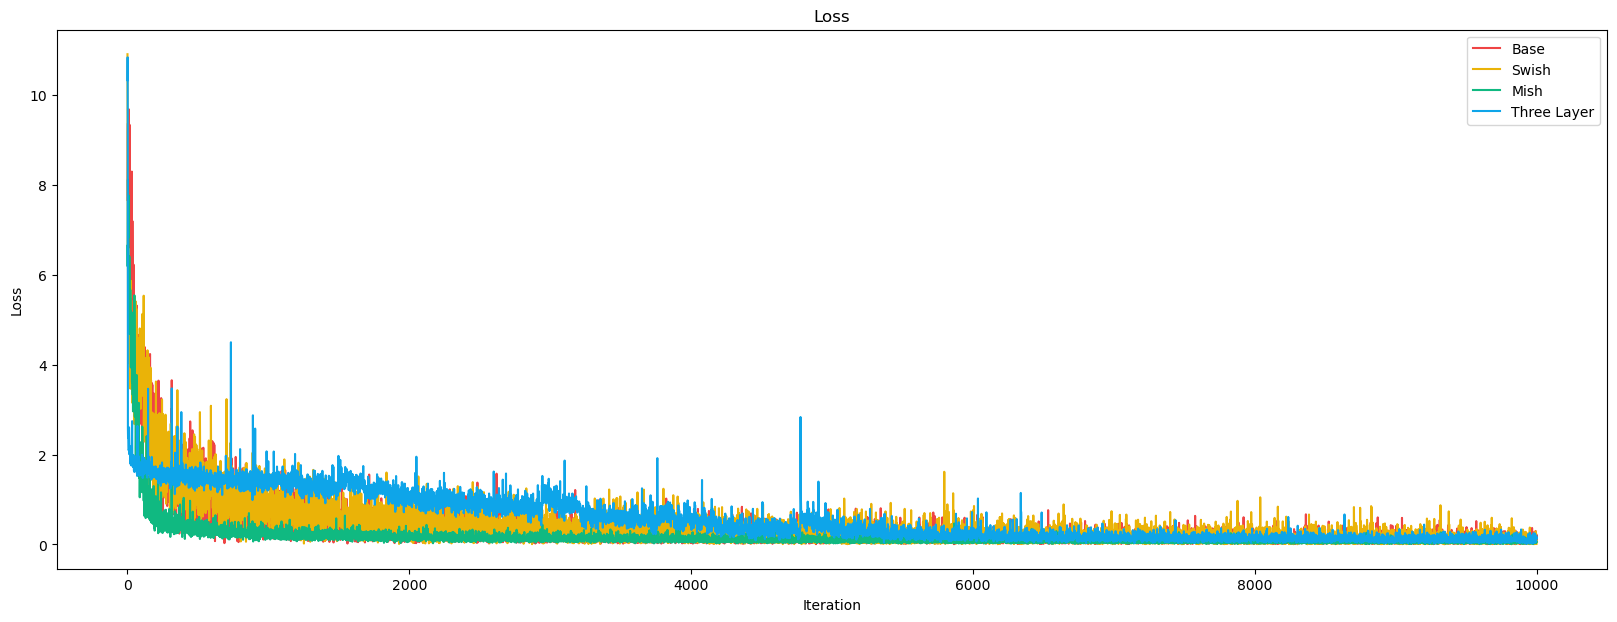

In [11]:
plt.plot(base_network_train_loss_list, color=color_pal[0], label="Base")
plt.plot(swish_train_loss_list, color=color_pal[3], label="Swish")
plt.plot(mish_train_loss_list, color=color_pal[6], label="Mish")
plt.plot(tln_train_loss_list, color=color_pal[9], label="Three Layer")
plt.legend()
plt.title("Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")

fig = plt.gcf()
fig.set_size_inches(20, 7, forward=True)

plt.show()

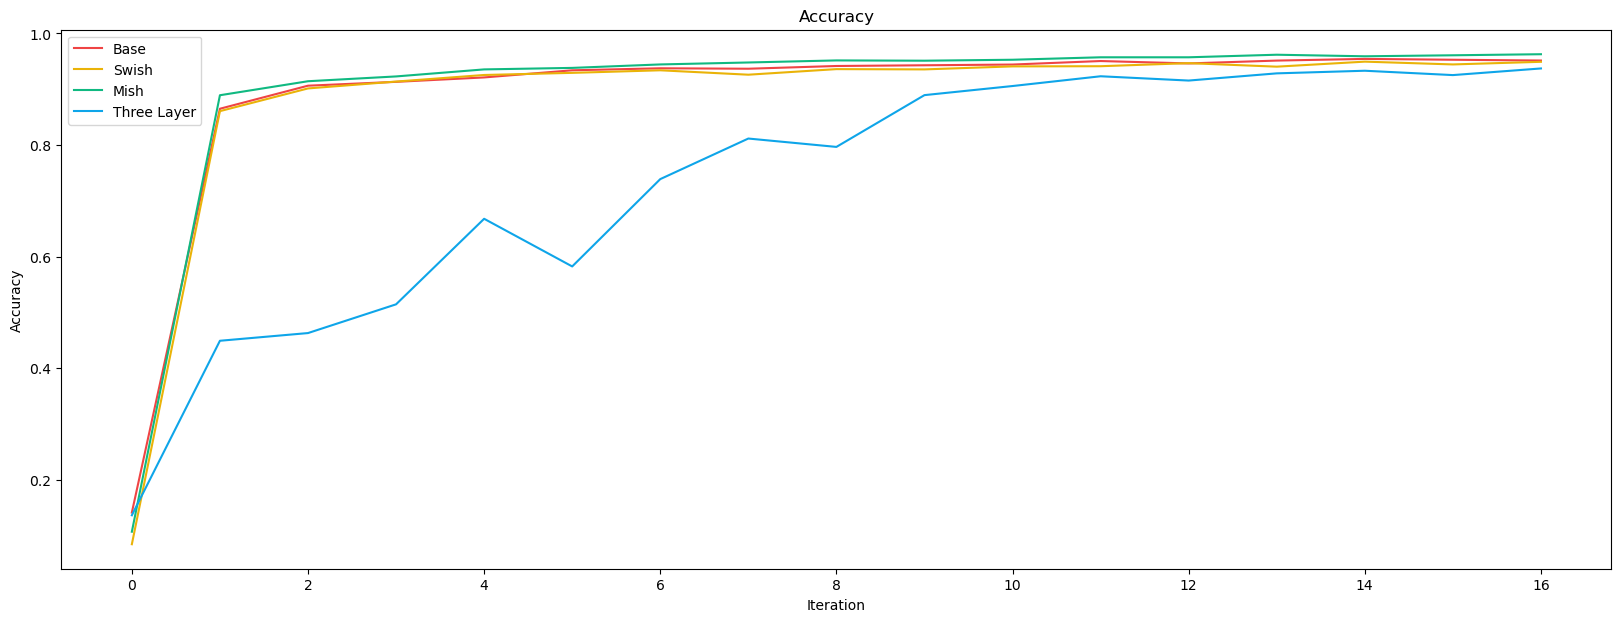

In [21]:
plt.plot(base_network_test_acc_list, color=color_pal[0], label="Base")
plt.plot(swish_test_acc_list, color=color_pal[3], label="Swish")
plt.plot(mish_test_acc_list, color=color_pal[6], label="Mish")
plt.plot(tln_test_acc_list, color=color_pal[9], label="Three Layer")
plt.legend()
plt.title("Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")

fig = plt.gcf()
fig.set_size_inches(20, 7, forward=True)

plt.show()